In [14]:
from scipy.stats import skewnorm, norm, expon, poisson
import numpy as np
import matplotlib.pyplot as plt
from multivariate_skewnorm import *
import seaborn as sns
import random

plt.rcParams['figure.dpi'] = 300

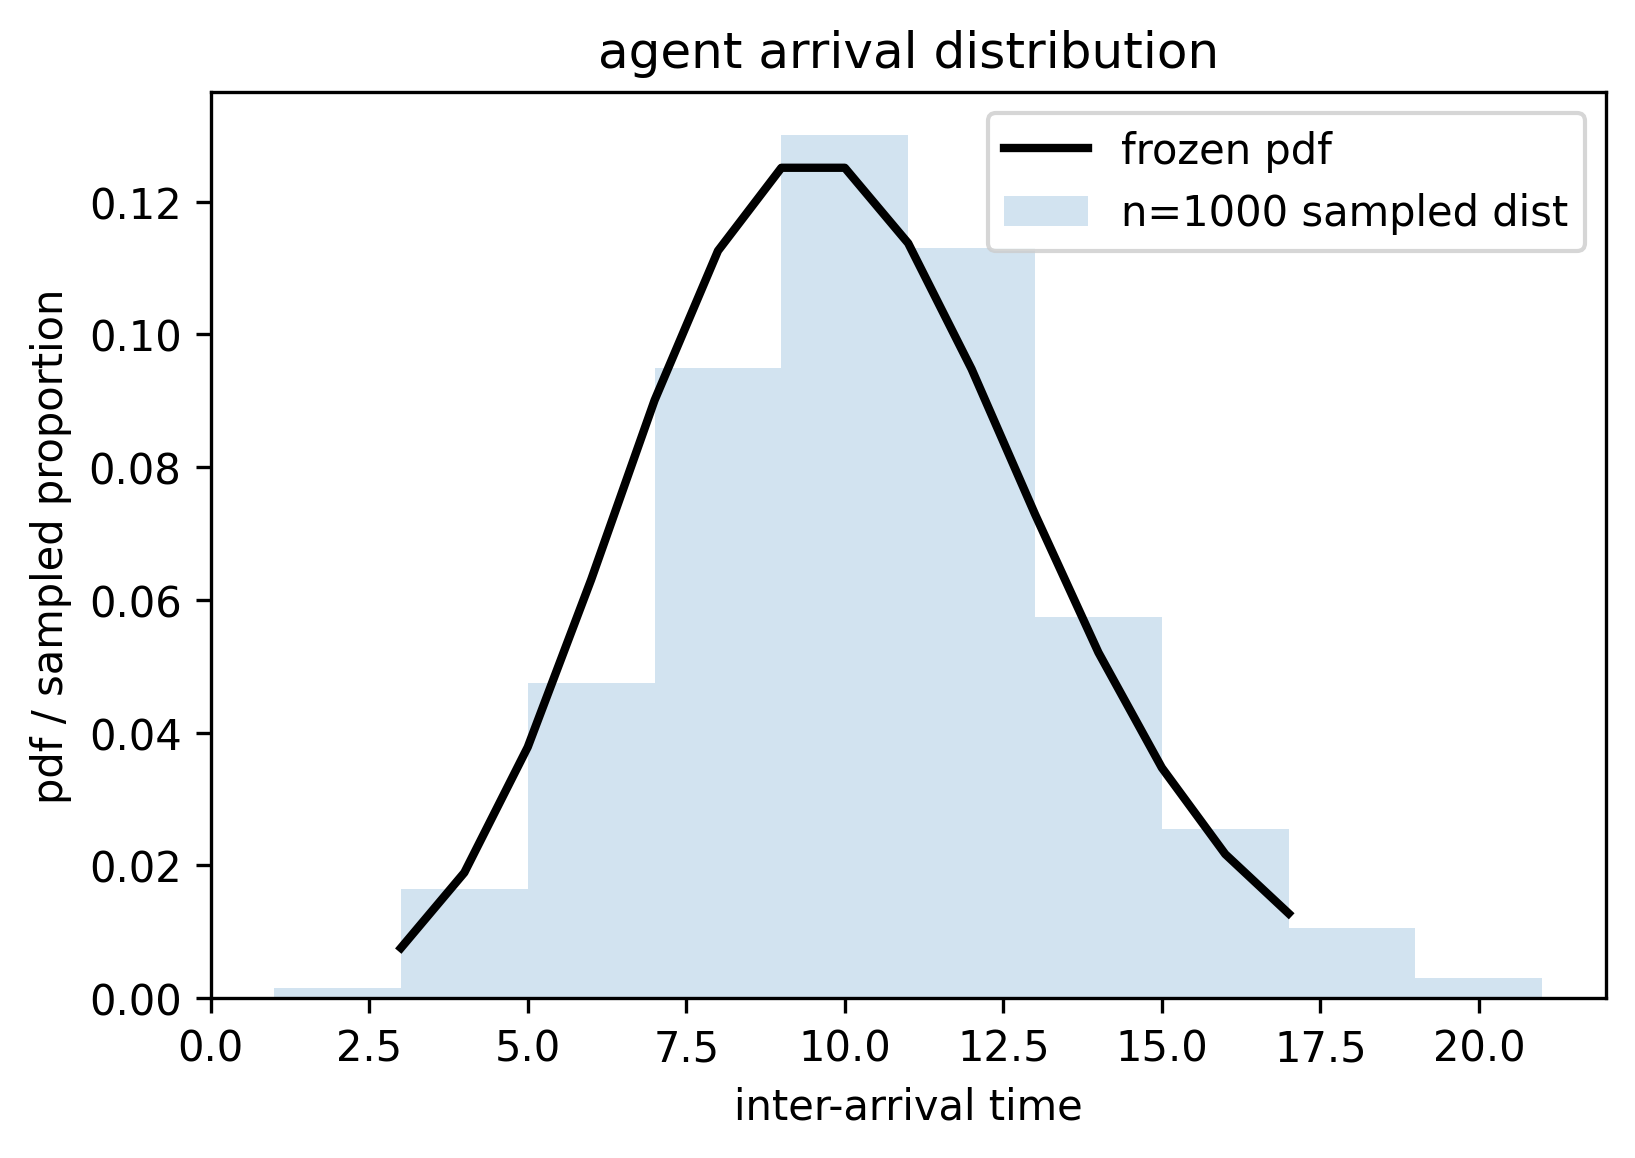

In [15]:
# agent arrival rates

mean = 10
rv = poisson(mean)
x = np.arange(round(poisson.ppf(0.01, mean)), round(poisson.ppf(0.99, mean)), 1)

plt.plot(x, rv.pmf(x), 'k-', lw=2, label='frozen pdf')

r = poisson.rvs(mean, size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2, label="n=1000 sampled dist")
plt.title("agent arrival distribution")
plt.xlabel("inter-arrival time")
plt.ylabel("pdf / sampled proportion")
plt.legend()
plt.show()

In [16]:
maker_waits = []
taker_waits = []

curr_maker = 0
curr_taker = 0

taker_probability = 0.4
time = 0

while time < 100000:
    time += random.expovariate(0.1)
    agent_is_taker = random.random() < taker_probability
    if agent_is_taker:
        taker_waits.append(time - curr_taker)
        curr_taker = time
    else: 
        maker_waits.append(time - curr_maker)
        curr_maker = time

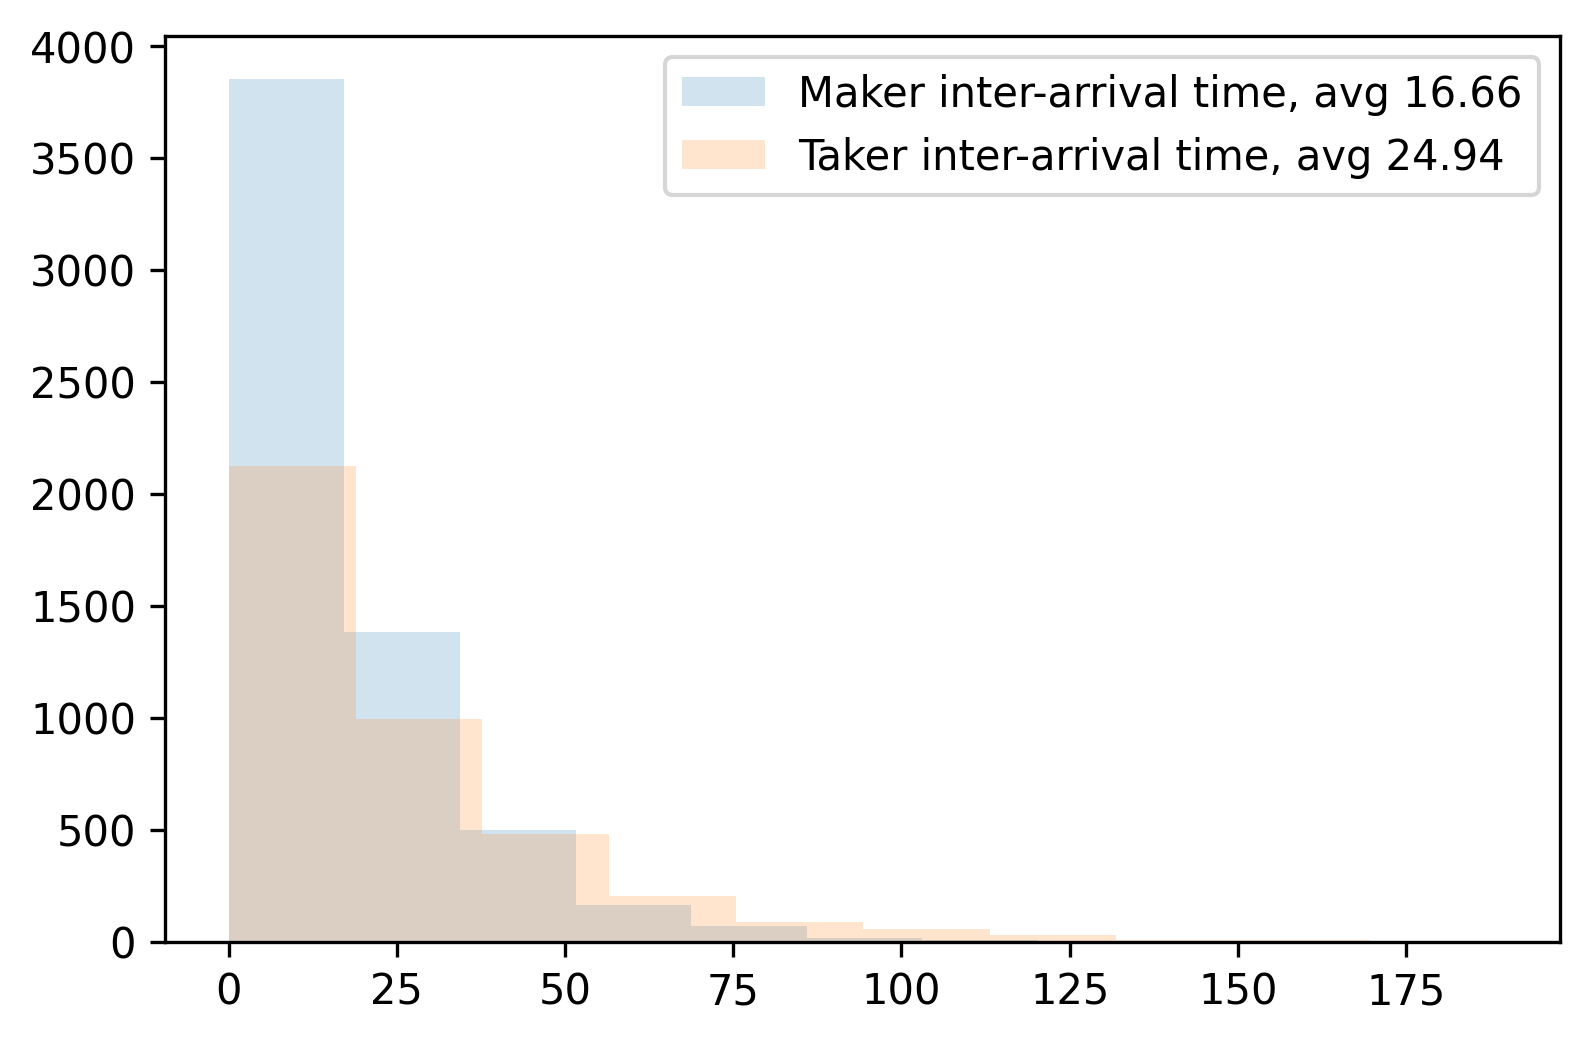

In [17]:
plt.hist(maker_waits, alpha=0.2, label=f"Maker inter-arrival time, avg {round(np.mean(maker_waits), 2)}")
plt.hist(taker_waits, alpha=0.2, label=f"Taker inter-arrival time, avg {round(np.mean(taker_waits), 2)}")
plt.legend()
plt.show()

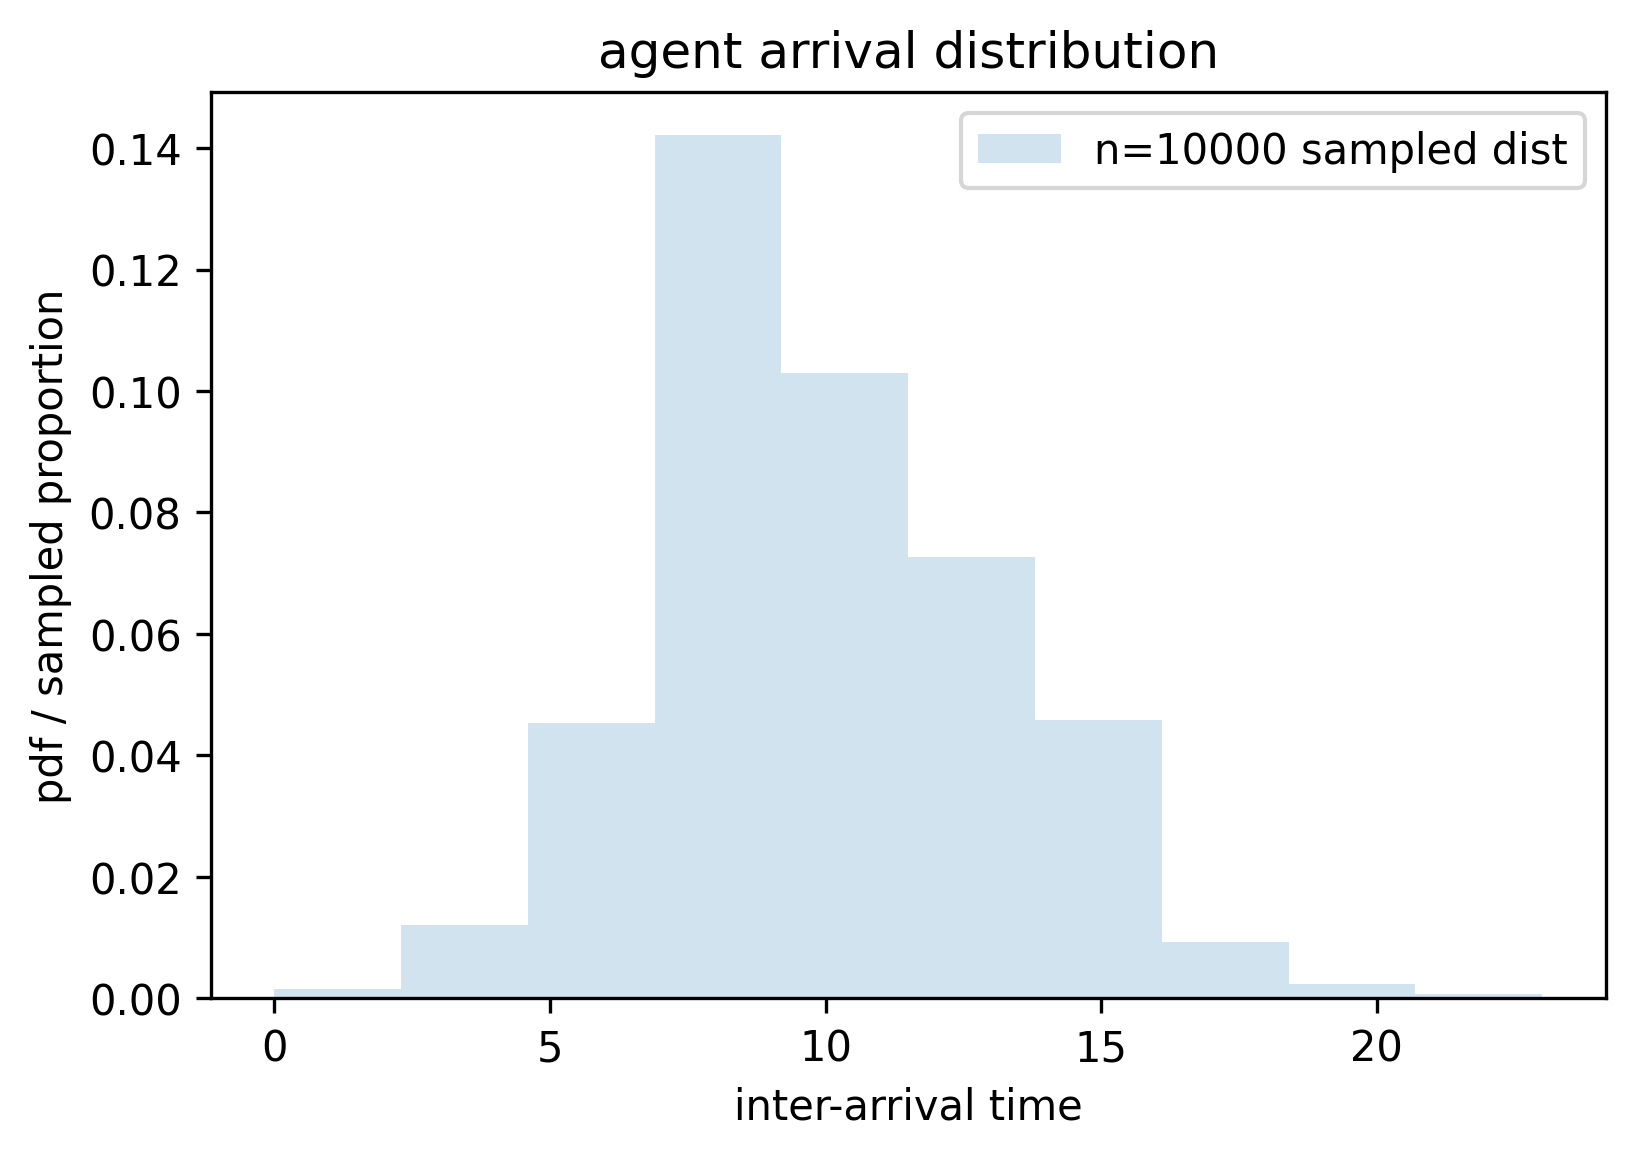

In [18]:
# agent arrival rates
r = poisson.rvs(mean, size=10000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2, label="n=10000 sampled dist")
plt.title("agent arrival distribution")
plt.xlabel("inter-arrival time")
plt.ylabel("pdf / sampled proportion")
plt.legend()
plt.show()

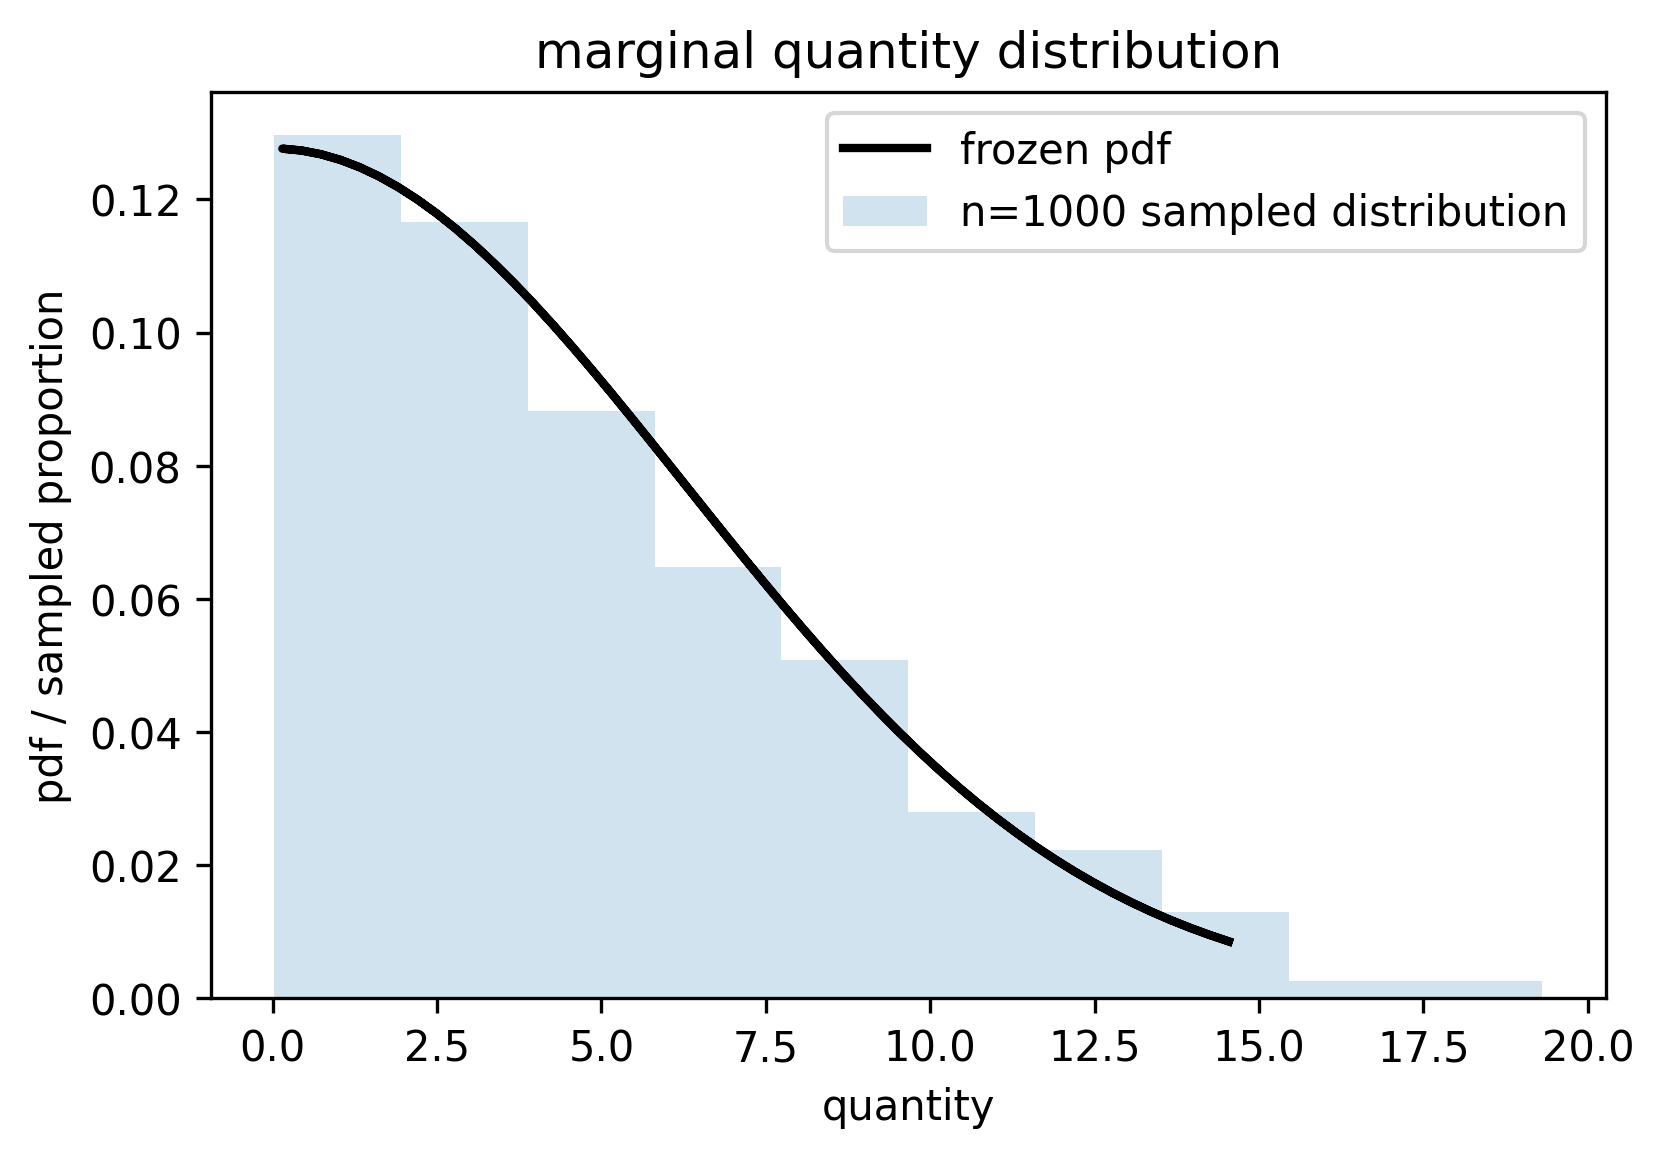

In [19]:
# quantity distributions
a = 0
mean = 0
sd = 6.25

# plt.figure(figsize=(10, 6))
rv = skewnorm(a, loc=mean, scale=sd)
x = np.linspace(skewnorm.ppf(0.01, a, loc=mean, scale=sd), skewnorm.ppf(0.99, a, loc=mean, scale=sd), 100)

plt.plot(abs(x), 2 * rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = skewnorm.rvs(a, loc=mean, scale=sd, size=1000)
plt.hist(abs(r), density=True, histtype='stepfilled', alpha=0.2, label="n=1000 sampled distribution")
plt.title("marginal quantity distribution")
plt.xlabel("quantity")
plt.ylabel("pdf / sampled proportion")
plt.legend()
plt.show()

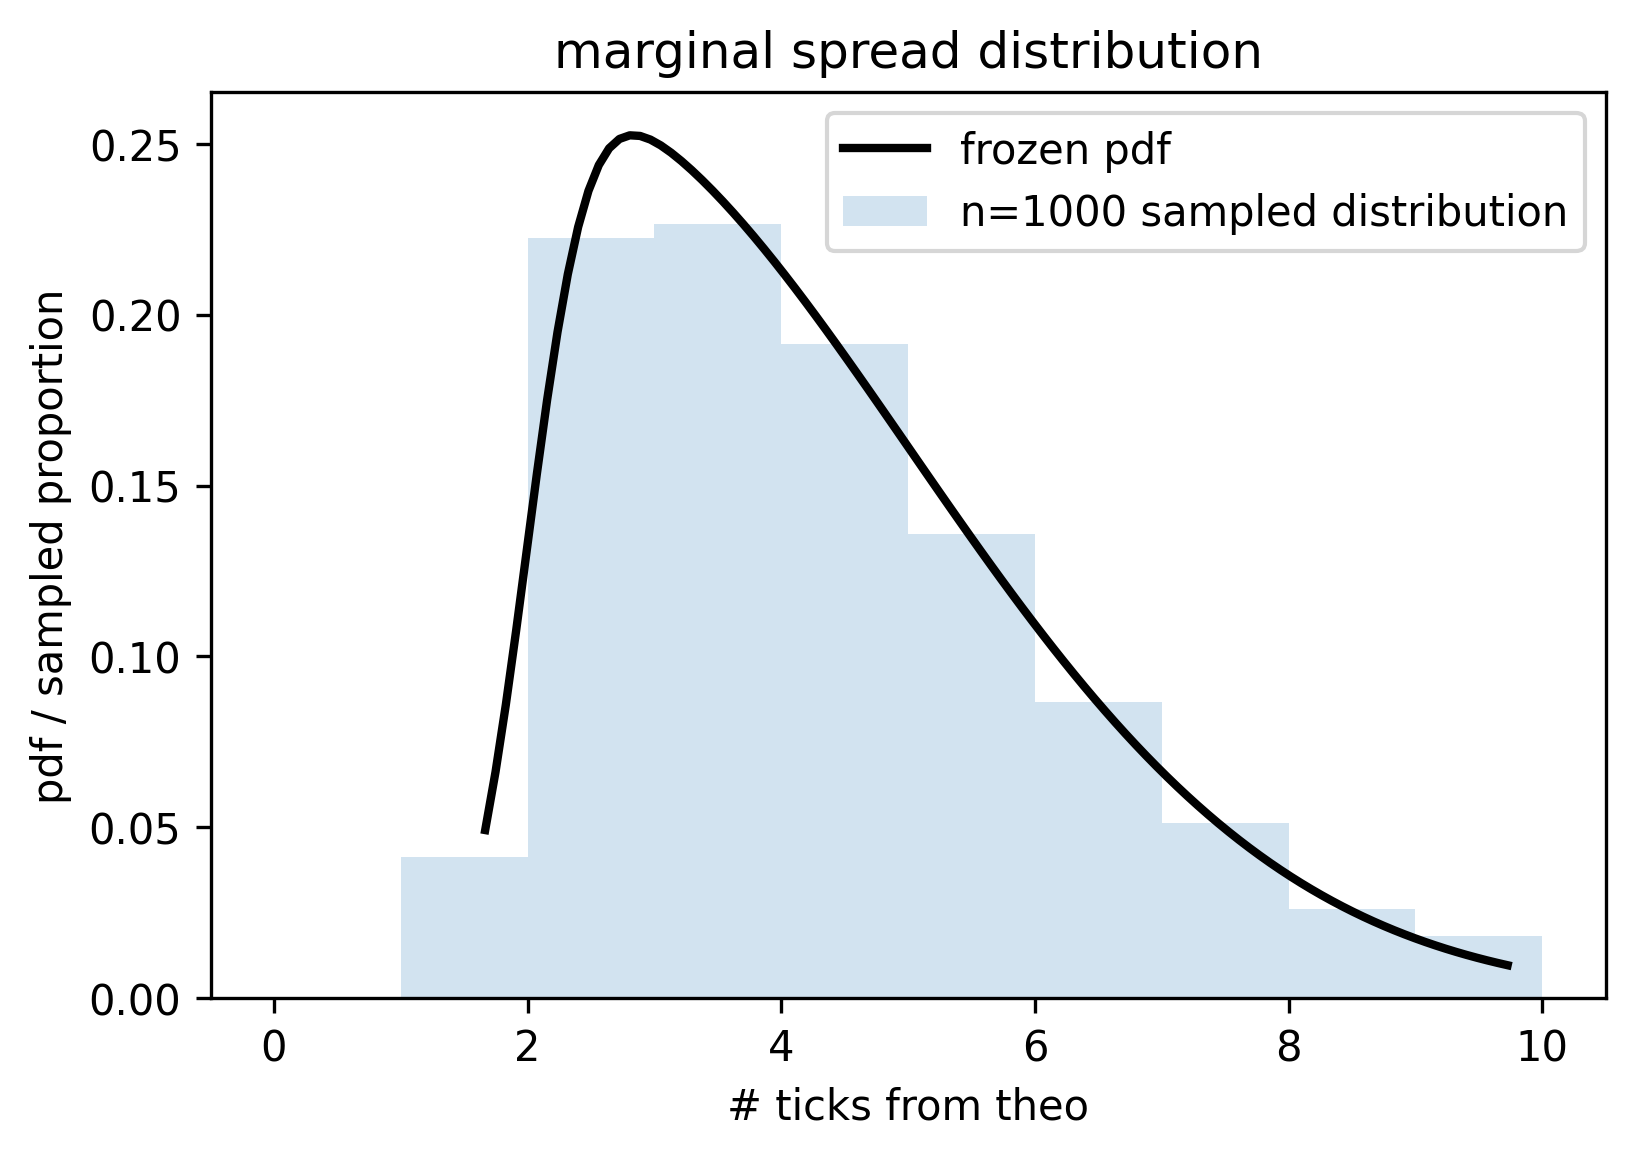

In [20]:
# spread distributions, in units of ticks from theo value
a = 8
rv = skewnorm(a, loc=2, scale=3)
x = np.linspace(skewnorm.ppf(0.01, a, loc=2, scale=3), skewnorm.ppf(0.99, a, loc=2, scale=3), 100)

plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = skewnorm.rvs(a, loc=2, scale=3, size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], label="n=1000 sampled distribution")
plt.title("marginal spread distribution")
plt.xlabel("# ticks from theo")
plt.ylabel("pdf / sampled proportion")
plt.legend()
plt.show()

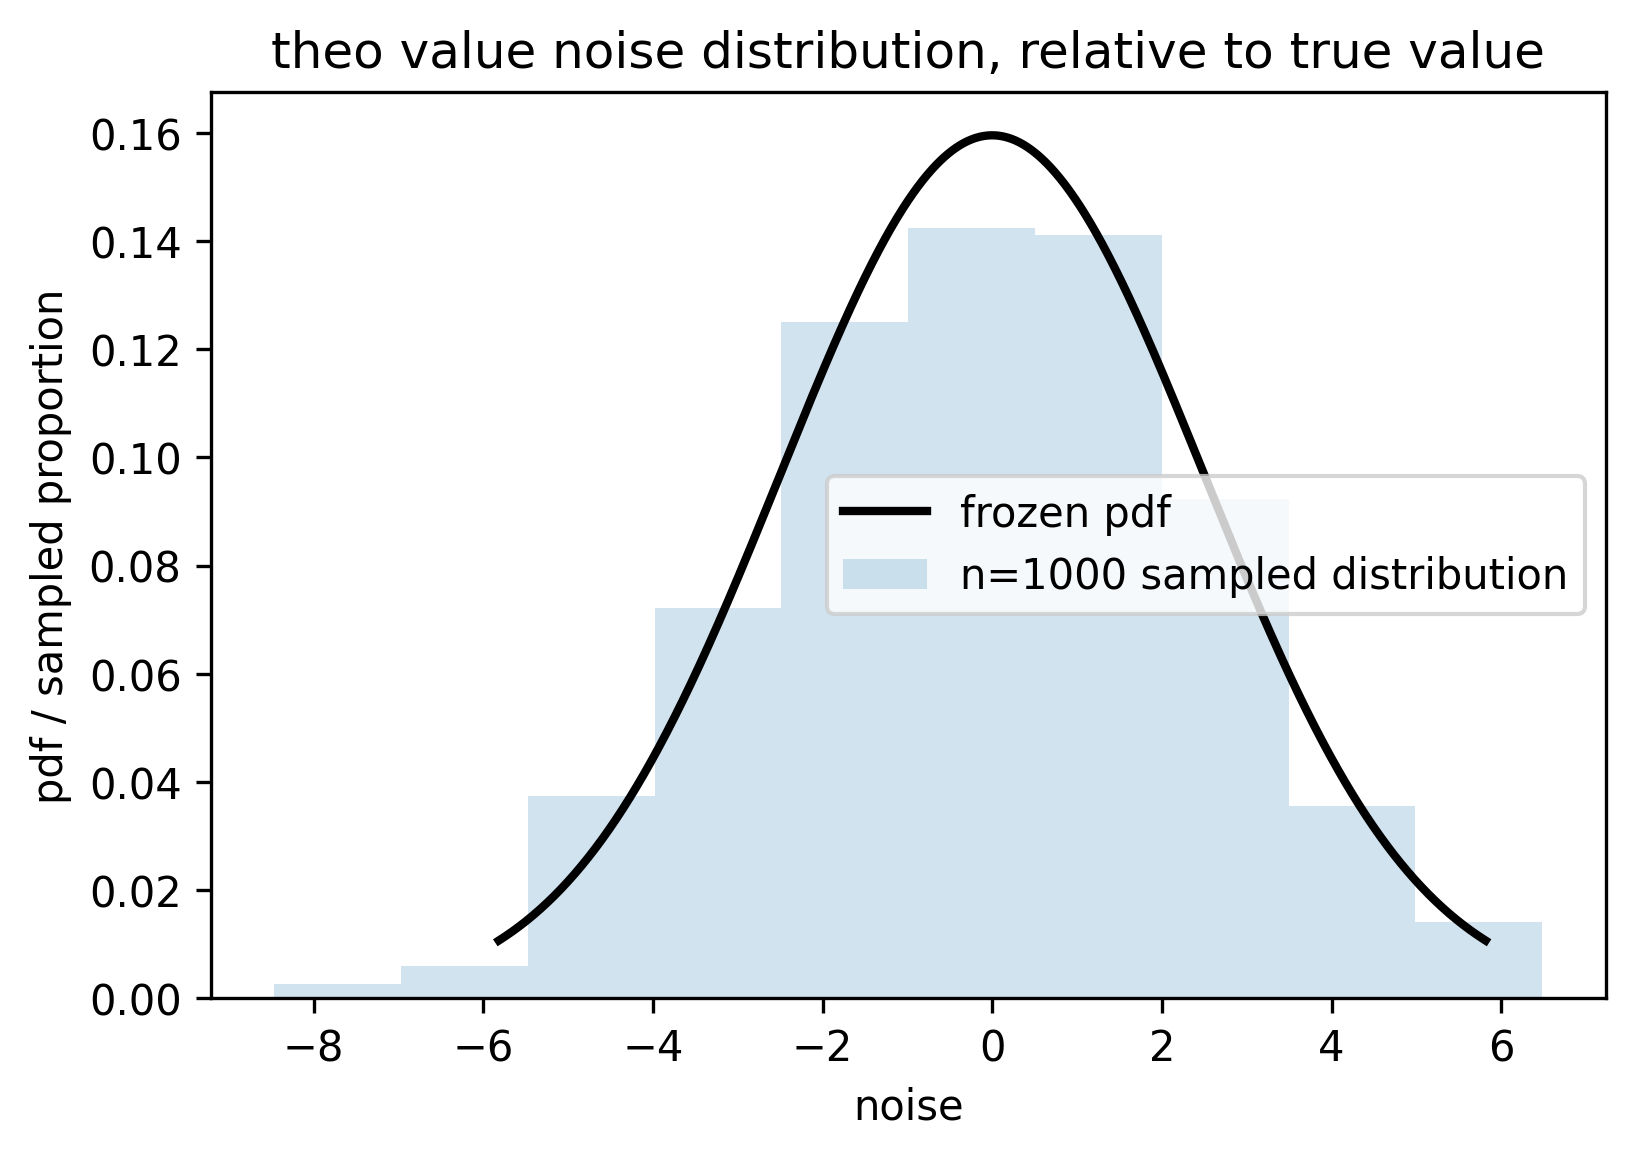

In [21]:
# agent theo value
# simply add gaussian noise

sd = 2.5
rv = norm(scale=sd)
x = np.linspace(norm.ppf(0.01, scale=sd), norm.ppf(0.99, scale=sd), 1000)

plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = norm.rvs(scale=sd, size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2, label="n=1000 sampled distribution")
plt.title("theo value noise distribution, relative to true value")
plt.xlabel("noise")
plt.ylabel("pdf / sampled proportion")
plt.legend()
plt.show()

In [22]:
# for now cancel duration can just be an integer
cancel_duration = 180 # seconds

In [23]:
3 * 2.5 * 0.75

5.625

Text(0.5, 0.98, 'joint distribution of spread and quantity, correlation=-0.75')

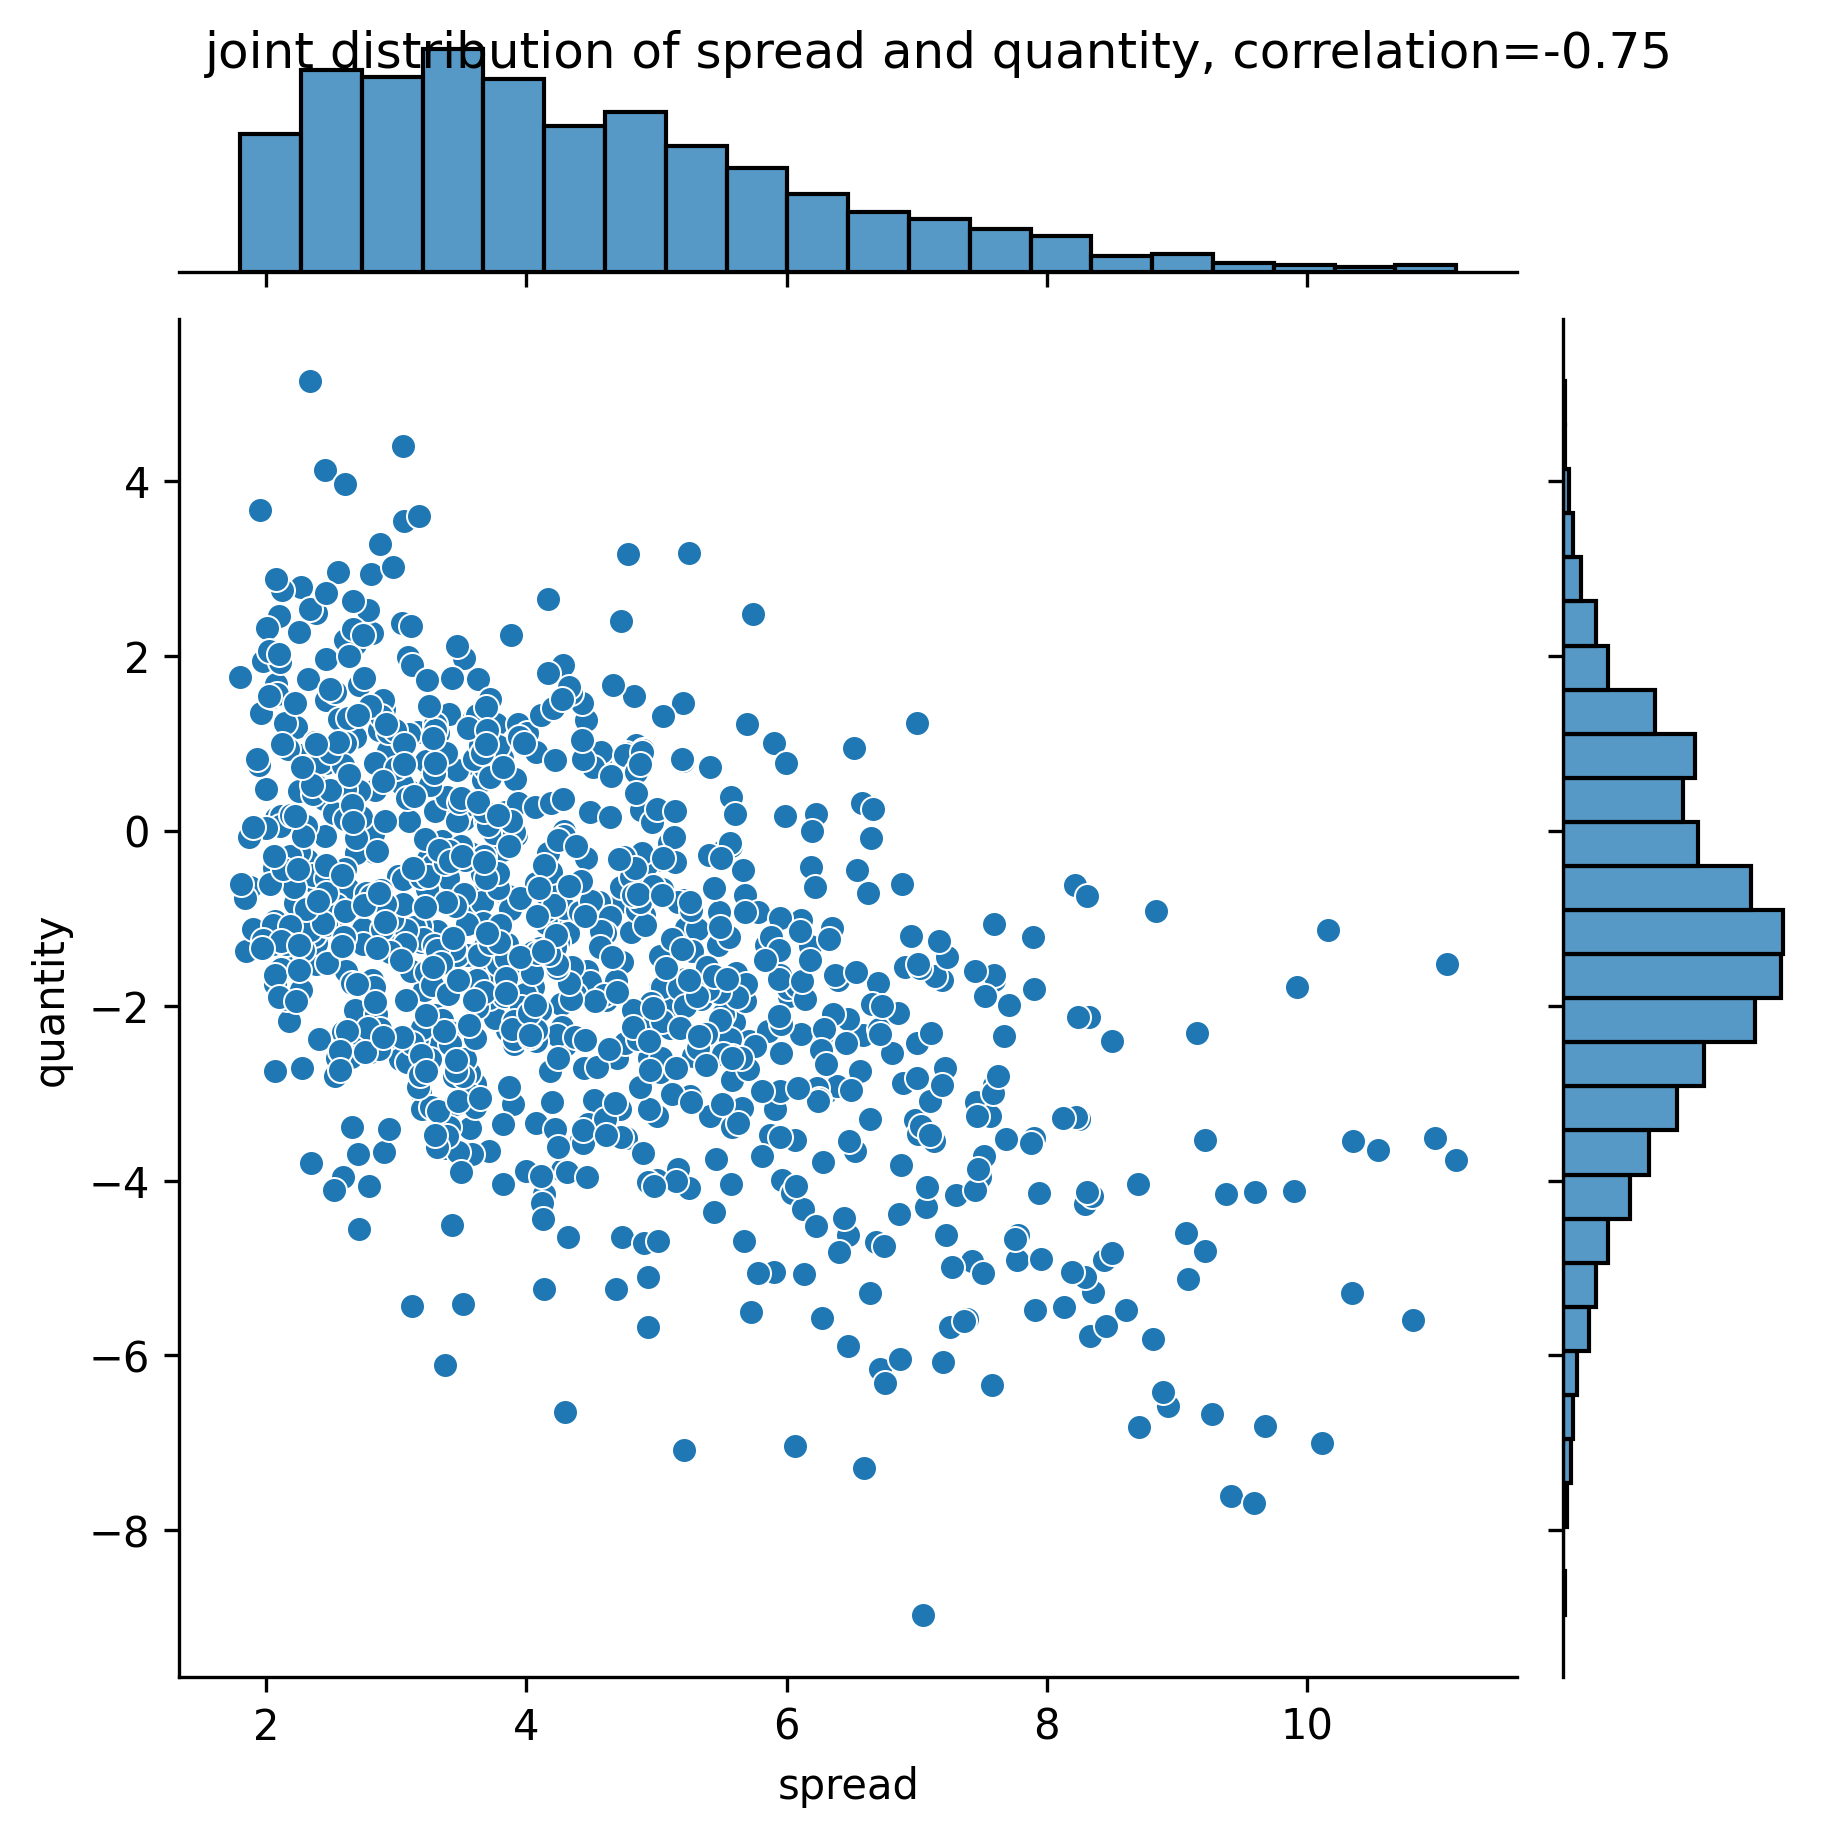

In [24]:
alphas = [8, 0]
mean = [2, 0]
cov = [[9, -5.625], [-5.625, 6.25]]

data = multivariate_skewnorm(alphas, mean, cov).rvs(size=1000)

# Plotting the generated samples
h = sns.jointplot(x=data[:,0], y=data[:,1], kind="scatter")
h.set_axis_labels("spread", "quantity")

h.fig.suptitle("joint distribution of spread and quantity, correlation=-0.75")

Text(0.5, 0.98, 'joint distribution of spread and quantity, correlation=-0.75')

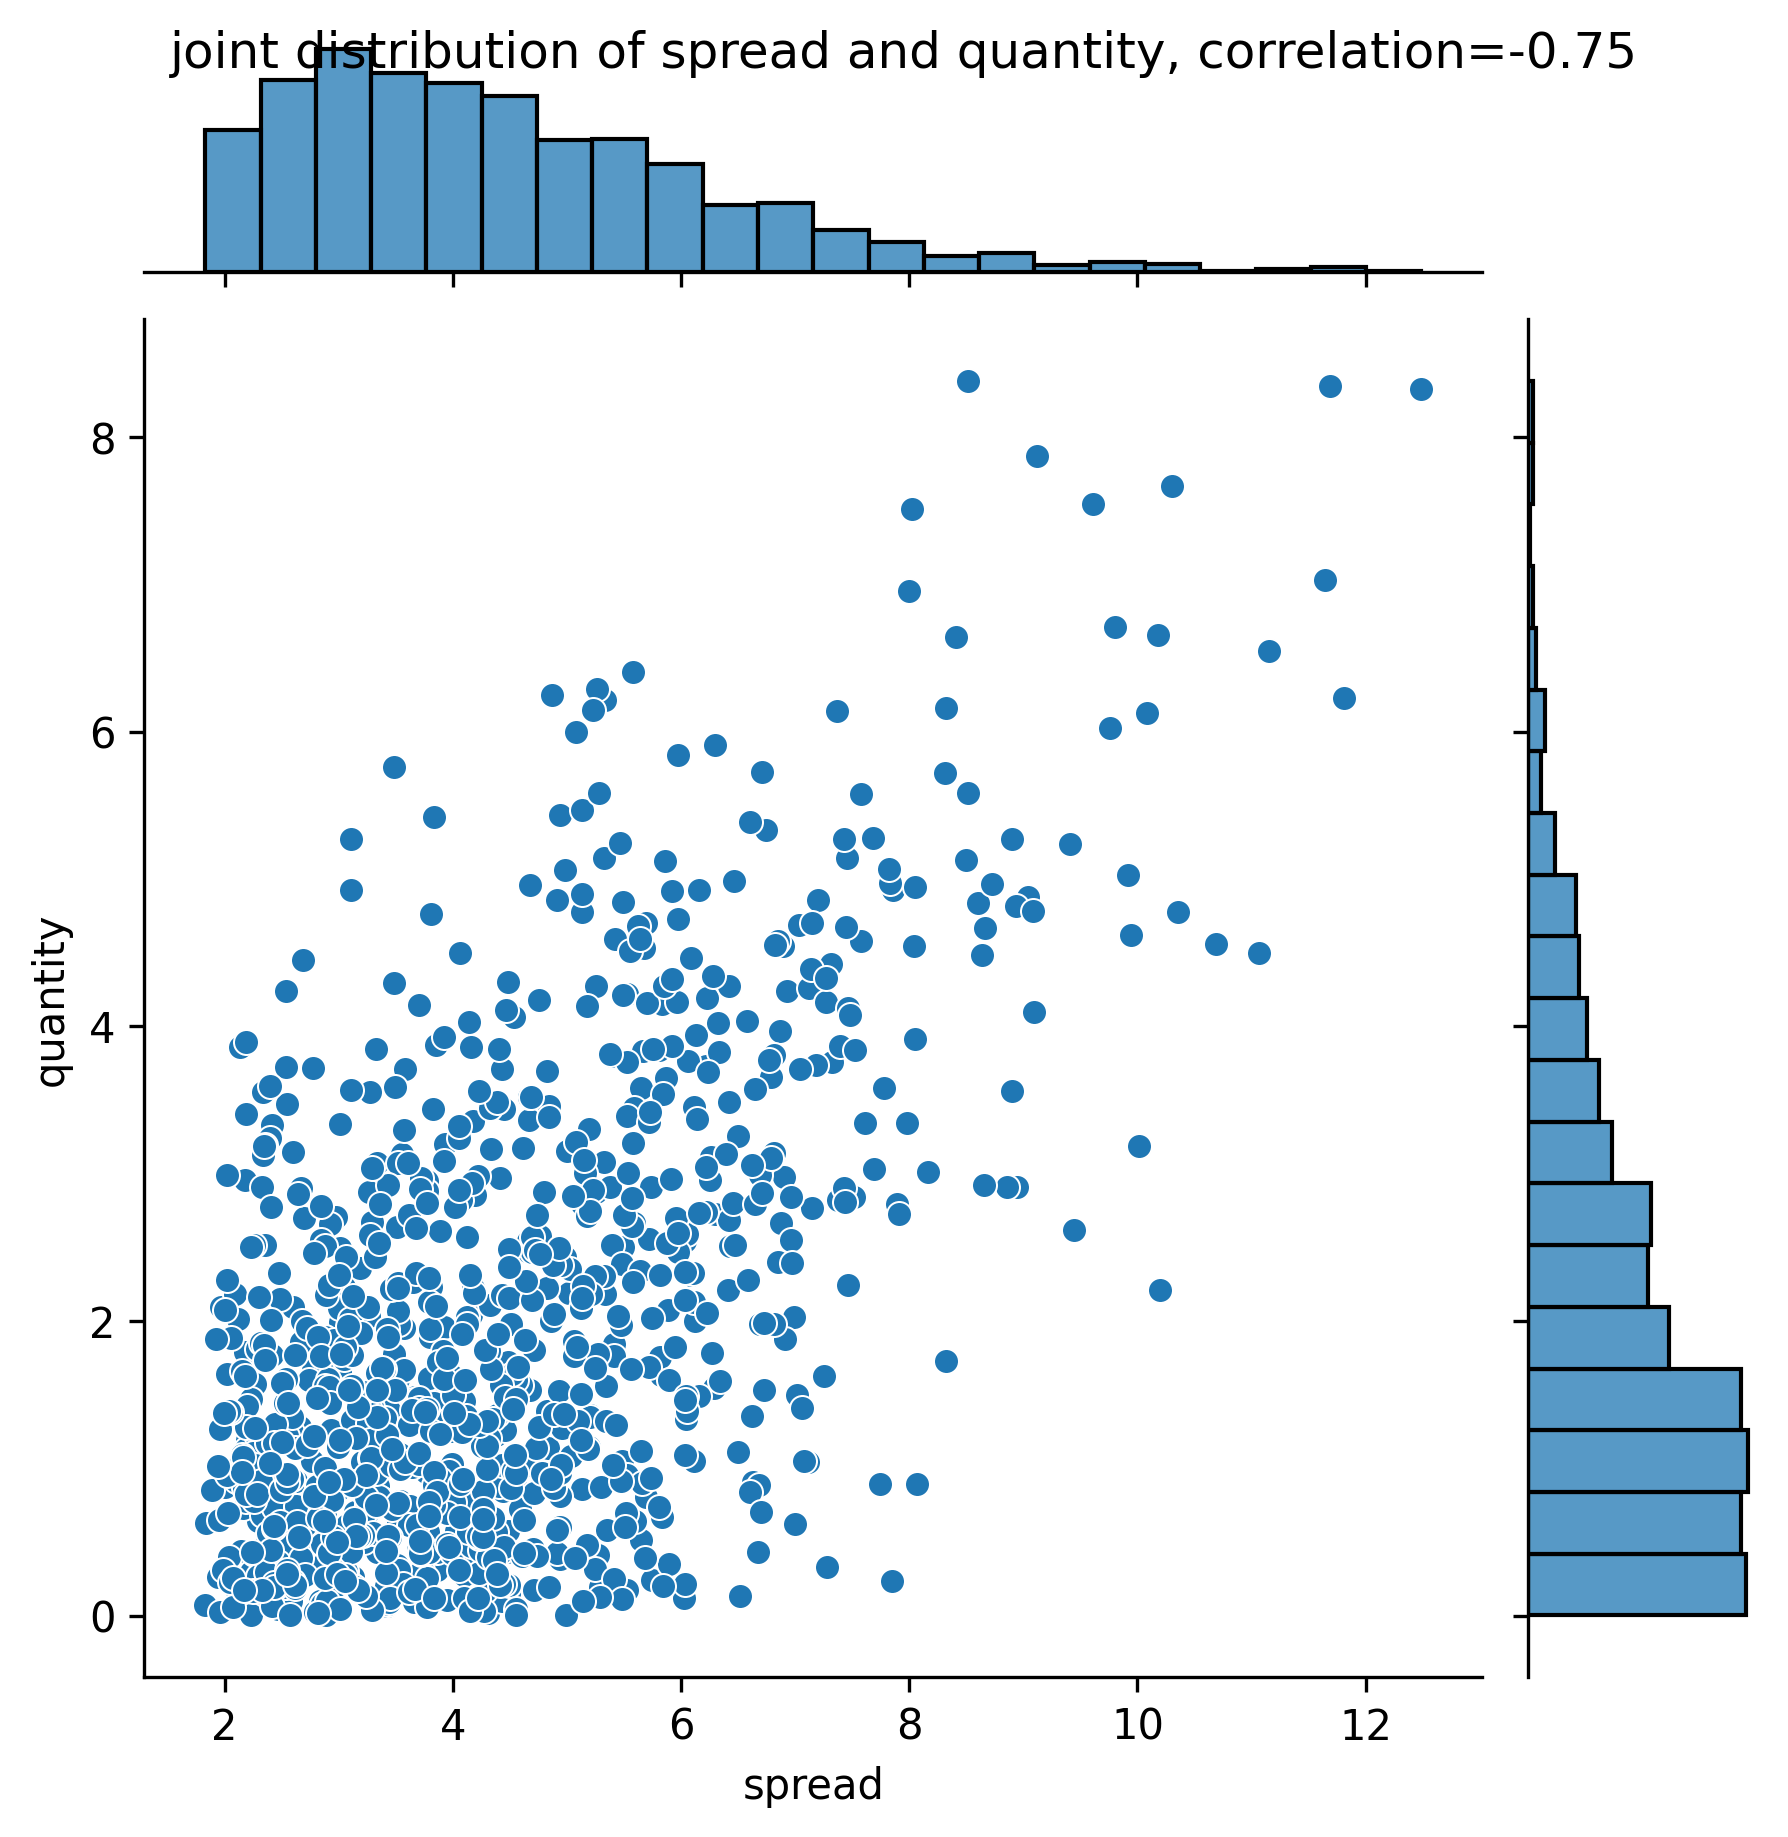

In [27]:
alphas = [8, 0]
mean = [2, 0]
cov = [[9, -5.625], [-5.625, 6.25]]

data = multivariate_skewnorm(alphas, mean, cov).rvs(size=1000)

# Plotting the generated samples
h = sns.jointplot(x=data[:,0], y=abs(data[:,1]), kind="scatter")
h.set_axis_labels("spread", "quantity")

h.fig.suptitle("joint distribution of spread and quantity, correlation=-0.75")

(8.007376383563305, 15.027551502539854, 8.403733911148429, 14.870523602301414)

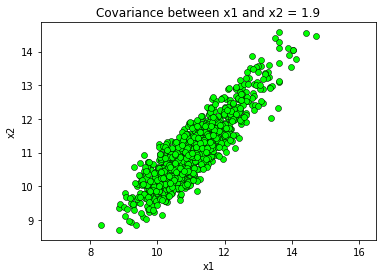

In [12]:
alphas = [1, 1]
mean = [10, 10]
cov = [[2, 1.9], [1.9, 2]]

data = multivariate_skewnorm(alphas, mean, cov).rvs_fast(size=1000)

# Plotting the generated samples
plt.plot(data[:,0],data[:,1], 'o', c='lime',
            markeredgewidth = 0.5,
            markeredgecolor = 'black')
plt.title(f'Covariance between x1 and x2 = {cov[0][1]}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')

(4.356653418402679,
 9.943567466103662,
 -0.21086277031260026,
 11.887939299317091)

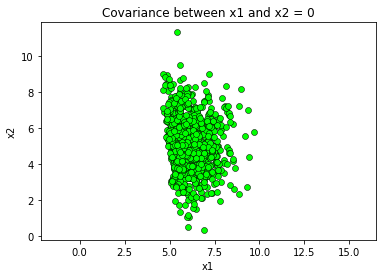

In [13]:
alphas = [10, 1]
mean = [5, 5]
cov = [[2, 0], [0, 2]]

data = multivariate_skewnorm(alphas, mean, cov).rvs_fast(size=1000)

# Plotting the generated samples
plt.plot(data[:,0],data[:,1], 'o', c='lime',
            markeredgewidth = 0.5,
            markeredgecolor = 'black')
plt.title(f'Covariance between x1 and x2 = {cov[0][1]}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')

(4.119857652177639, 9.6552344207199, 4.224912736515382, 9.561872575907982)

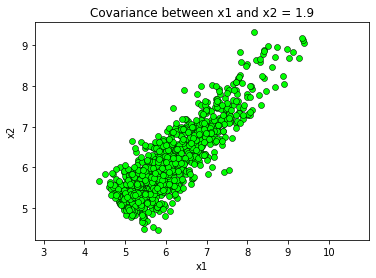

In [15]:
alphas = [10, 10]
mean = [5, 5]
cov = [[2, 1.9], [1.9, 2]]

data = multivariate_skewnorm(alphas, mean, cov).rvs_fast(size=1000)

# Plotting the generated samples
plt.plot(data[:,0],data[:,1], 'o', c='lime',
            markeredgewidth = 0.5,
            markeredgecolor = 'black')
plt.title(f'Covariance between x1 and x2 = {cov[0][1]}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')